# MAC0417/5768 - Visão e Processamento de Imagens

**Aluno**: Lucas Martinuzzo Batista

## EP2.1 Data augmentation

Cada grupo deve criar um JN contendo funções para fazer data augmentation do dataset do EP1. Mais informações sobre Data Augmentation são encontradas aqui:

https://github.com/aleju/imgaug

https://www.kaggle.com/parulpandey/overview-of-popular-image-augmentation-packages

As funções de data augmentation serão aplicadas a imagens em níveis de cinza. Portanto, o dataset original precisará ser convertido para níveis de cinza. Deve-se criar 5 funções de data augmentation. Cada função será aplicada a cada imagem do dataset do EP1. Assim, o augmentedDataset terá 5X o tamanho do original. Cada grupo deve implementar as seguintes funções de data augmentation:

RGB2gray (ie converter as imagens RGB originais em níveis de cinza)<br>
Soma de fundo com gradiente de níveis de cinza<br>
Logaritmo da imagem<br>
Exponencial da imagem<br>
Filtro da média implementado usando convolução

Deve-se usar as funções do EP1 para visualização dos resultados do augmentedDataSet.

### Link do Repositório:
https://github.com/LucasMartinuzzo/Visao-Computacional-2020-2

### Google Drive (Apenas Imagens)

https://drive.google.com/drive/folders/1CSLHaRzTfbsbN09WyKYIs3qf_qiBkQGT?usp=sharing

### Tabela Global Sumária

| Atributo | Valor |
| :- | -: |
| Número de Classes | 10 |
| Número de Imagens | 1080 |
| Tamanho da Base| 150 mb |
| Dimensão | 720 x 960 |

#### Tabela Detalhada Por Classe
| Classe | Qtd. Objetos | Qtd. Fundos | Qtd. luminação | Qtd. Repetições | Total de Amostras |
| :-: | :-: | :-: | :-: | :-: | :-: |
| Caneca | 3 | 3 | 4 | 3 | 108
| Caneta | 3 | 3 | 4 | 3 | 108
| Chave | 3 | 3 | 4 | 3 | 108
| Creme Dental | 3 | 3 | 4 | 3 | 108
| Faca | 3 | 3 | 4 | 3 | 108
| Fio Dental | 3 | 3 | 4 | 3 | 108
| Meia | 3 | 3 | 4 | 3 | 108
| Perfume | 3 | 3 | 4 | 3 | 108
| Pilha | 3 | 3 | 4 | 3 | 108
| Shampoo | 3 | 3 | 4 | 3 | 108

### Funções Auxiliares

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.colors import NoNorm
from scipy.ndimage import convolve
from PIL import Image
import os
import shutil
import numpy as np
%matplotlib inline

In [2]:
original_directory = "../Imagens/OriginalDataset/"
original_gray_dir = '../Imagens/OriginalGrayDataset/'
augmented_dir = '../Imagens/AugmentedDataset/'
N_SAMPLE_BY_CLASS = 4

#### Amostra de cada Classe

A função abaixo seleciona 4 imagens aleatórias de cada classe e guarda os nomes dos arquivos. Estas imagens serão utilizadas para visualizar o resultado das transformações aplicadas.

In [3]:
def selectRandImages(image_dir,n_sample_by_class = 4):
    folders = os.listdir(image_dir)
    rand_images = {}
    for folder in folders:
        list_images = []
        files = os.listdir(os.path.join(image_dir,folder))
        for sample in range(n_sample_by_class):
            list_images.append(files[np.random.randint(len(files),size=1)[0]])
            list_images.append(files[np.random.randint(len(files),size=1)[0]])
            list_images.append(files[np.random.randint(len(files),size=1)[0]])
            list_images.append(files[np.random.randint(len(files),size=1)[0]])
        rand_images[folder] = list_images
    return rand_images
rand_sample = selectRandImages(original_directory,N_SAMPLE_BY_CLASS)

A função abaixo plota as imagens aleatorias selecionadas.

In [4]:
def plotSample(image_dir,sample_images_dict,columns=4,gray_mode=False,prefix=None):
    rows = len(rand_sample)
    fig, axes = plt.subplots(rows,columns,figsize=(18,24),constrained_layout=True)
    axes.flatten()
    for i,title in enumerate(sample_images_dict):
        class_dir = os.path.join(image_dir,title)
        for j in range(columns):
            if prefix is None:
                filename = sample_images_dict[title][j]
            else:
                filename = prefix + '_' + sample_images_dict[title][j]
            with open(os.path.join(class_dir,filename),'rb') as f:
                image=Image.open(f)
                if(gray_mode):
                    axes[i][j].imshow(image,cmap='gray',norm=NoNorm())
                else:
                    axes[i][j].imshow(image)
                axes[i,0].set_ylabel(title,rotation=90,size='large',color="red")
                axes[i][j].set_yticks([])
                axes[i][j].set_xticks([])
    fig.show()
    return

#### Aplicação das Transformações
Essa função aplica as transformações implementadas nas próximas sessões nas imagens da pasta passada por parâmetro e salva na pasta de destino.

Opcionalmente pode-se adicionar um prefixo ao nome dos arquivos das imagens transformadas. Isto será útil ao salvar as imagens na pasta de imagens aumentadas, informando qual foi a transformação aplicada.
Também é possível passar um argumento adicional à função de transformação. Este argumento é útil para a soma de gradiende, onde é preciso passar a imagem gradiente utilizada para a função.

In [5]:
def applyFilter(source_dir,target_dir,function,prefix=None,aux=None):
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)
    classes_dir = os.listdir(source_dir)
    i = 0
    for class_folder in classes_dir:
        target_class_dir = os.path.join(target_dir,class_folder)
        if not os.path.exists(target_class_dir):
            os.makedirs(target_class_dir)
        source_class_dir = os.path.join(source_dir,class_folder)
        files = os.listdir(source_class_dir)
        for f in files:
            image = mpimg.imread(os.path.join(source_class_dir,f))
            if aux is None:
                filtered_image = Image.fromarray(function(image))
            else:
                filtered_image = Image.fromarray(function(image,aux))
            if prefix is None:
                target_filename = f
            else:
                target_filename = prefix + '_' + f
            filtered_image.save(os.path.join(target_class_dir,target_filename), 'JPEG', quality=95)
            i+=1
    print("Finalizado. {} imagens foram processadas.".format(i))
    return

#### Amostra das imagens coloridas

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


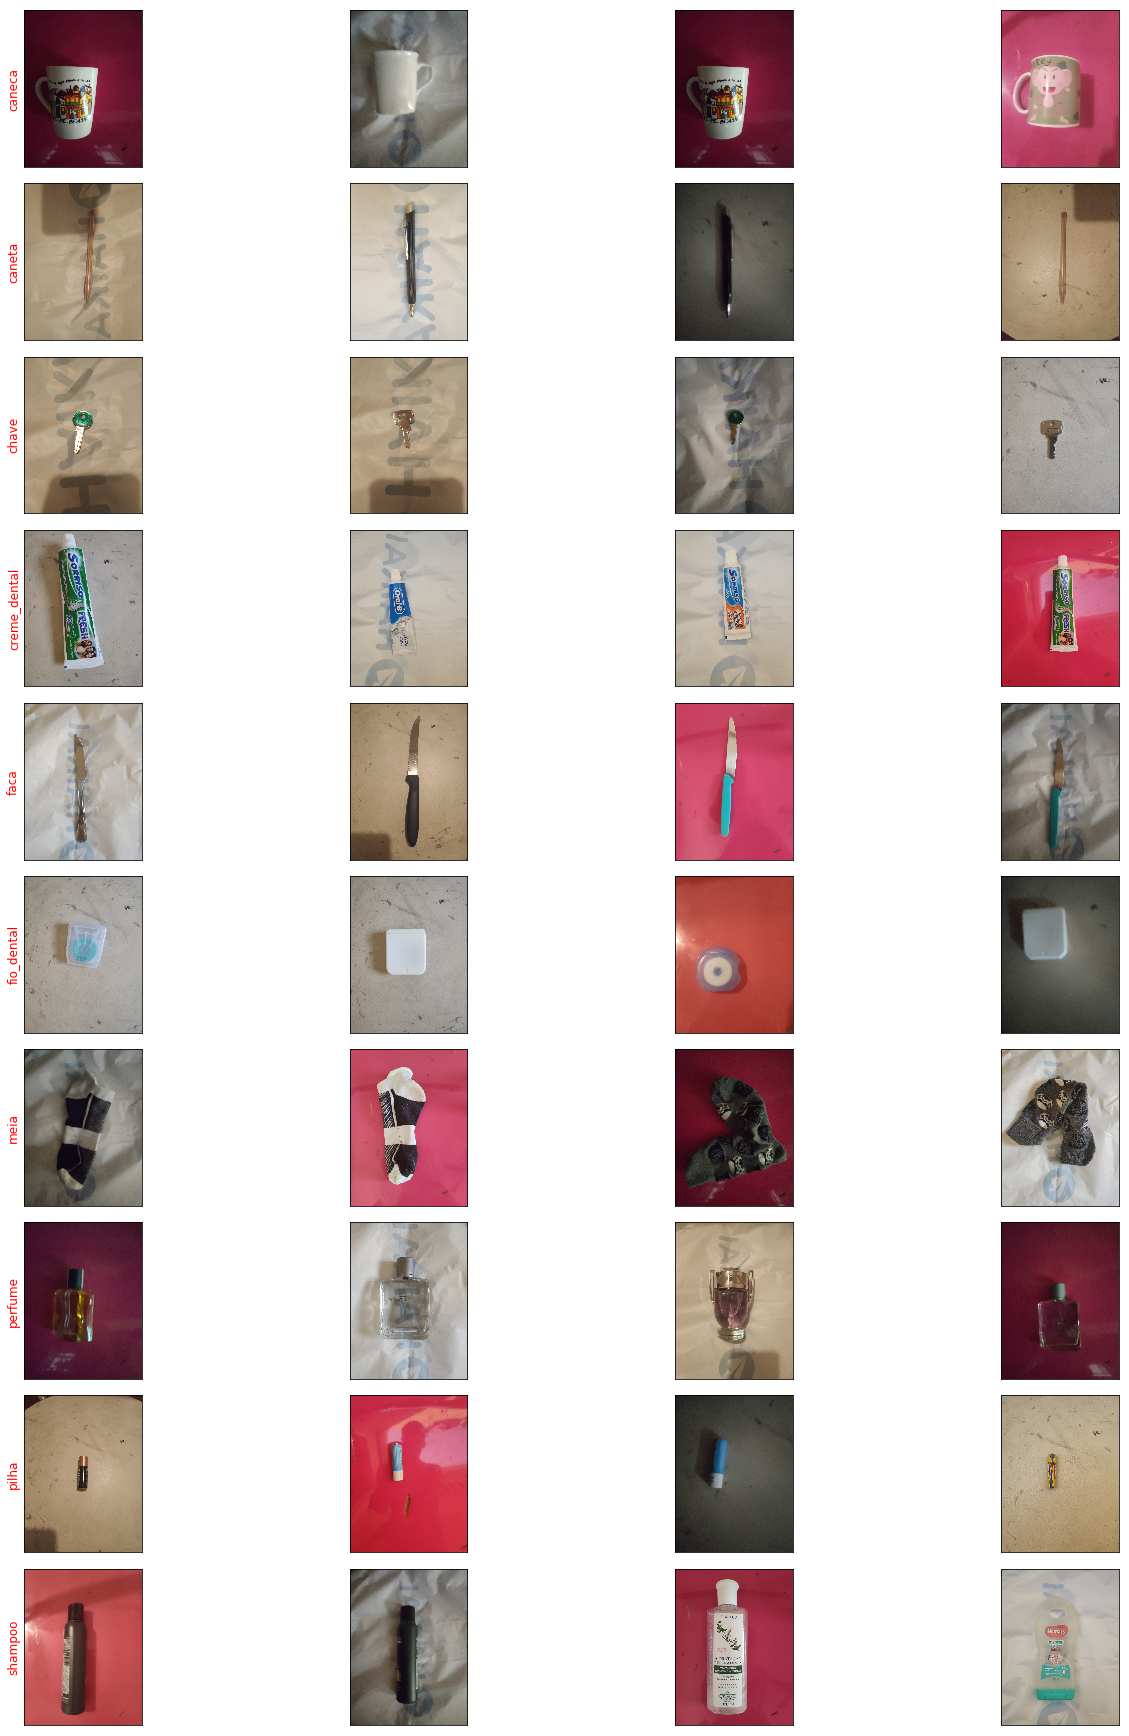

In [6]:
plotSample(original_directory,rand_sample,N_SAMPLE_BY_CLASS)

### Conversão Para Tons de Cinza

In [7]:
def rgb2gray(image):
    return np.dot(image[...,:3], [0.2125, 0.7154, 0.0721]).astype(np.uint8)

In [16]:
applyFilter(original_directory,original_gray_dir,rgb2gray)

Finalizado. 1080 imagens processadas


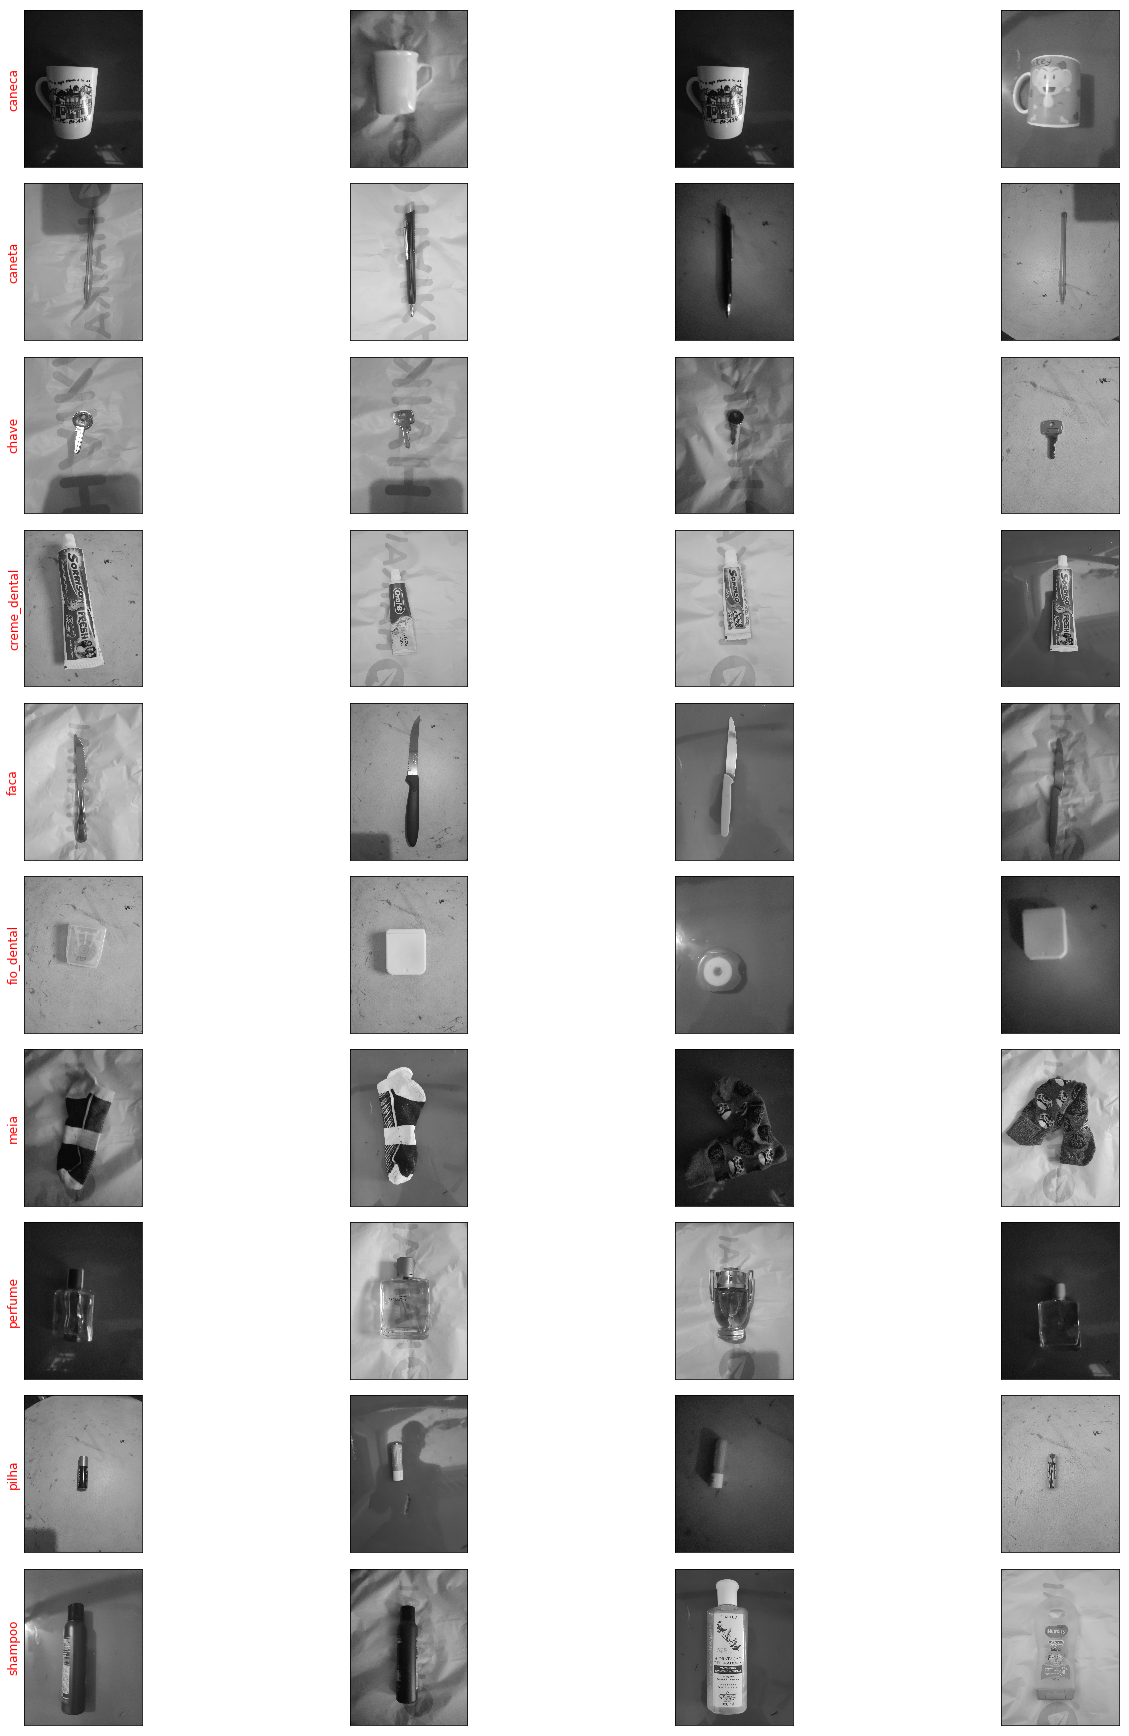

In [8]:
plotSample(original_gray_dir,rand_sample,N_SAMPLE_BY_CLASS,True)

### Aumento de Dados

Nesta sessão, as funções de aumento de dados serão aplicadas nas imagens em nível de cinza obtidas acima.

#### Preparar a pasta de Dados Aumentados
A pasta de dados aumentados será criada e as imagens em nível de cinza originais serão copiadas a ela.

In [19]:
classes_dir = os.listdir(original_gray_dir)
i = 0
for class_folder in classes_dir:
    target_class_dir = os.path.join(augmented_dir,class_folder)
    if not os.path.exists(target_class_dir):
        os.makedirs(target_class_dir)
    source_class_dir = os.path.join(original_gray_dir,class_folder)
    files = os.listdir(source_class_dir)
    for f in files:
        source_filename = os.path.join(source_class_dir,f)
        target_filename = os.path.join(target_class_dir,"original_" + f)
        if os.path.isfile(source_filename):
            shutil.copy(source_filename, target_filename)
        i+=1
print("Finalizado. {} imagens processadas".format(i))

Finalizado. 1080 imagens processadas


#### Soma de Fundo com Gradiente em Níveis de Cinza
Nesta sessão as imagens em níveis de cinza serão somadas com uma imagem gradiente padrão.

In [17]:
gradient = mpimg.imread('../Imagens/GrayGradientMask3.jpeg')

In [18]:
gradient.shape

(960, 720, 3)

Como a leitura da imagem foi feita em RGB, a mascara será convertida para nível de cinza através da mesma função utilizada no passo anterior.

In [19]:
gradient = rgb2gray(gradient)

In [20]:
gradient.shape

(960, 720)

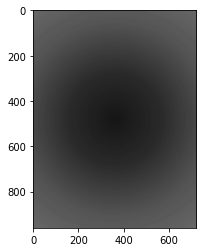

In [21]:
plt.imshow(gradient,cmap='gray',norm=NoNorm())

In [22]:
def sumImages(image_1,image_2):
    sum_images = image_1*1.0 + image_2*1.0
    mask = sum_images > 255
    sum_images[mask] = 255
    sum_images = sum_images.astype('uint8')
    return sum_images    

In [23]:
applyFilter(original_gray_dir,augmented_dir,sumImages,'gradient',gradient)

Finalizado. 1080 imagens foram processadas.


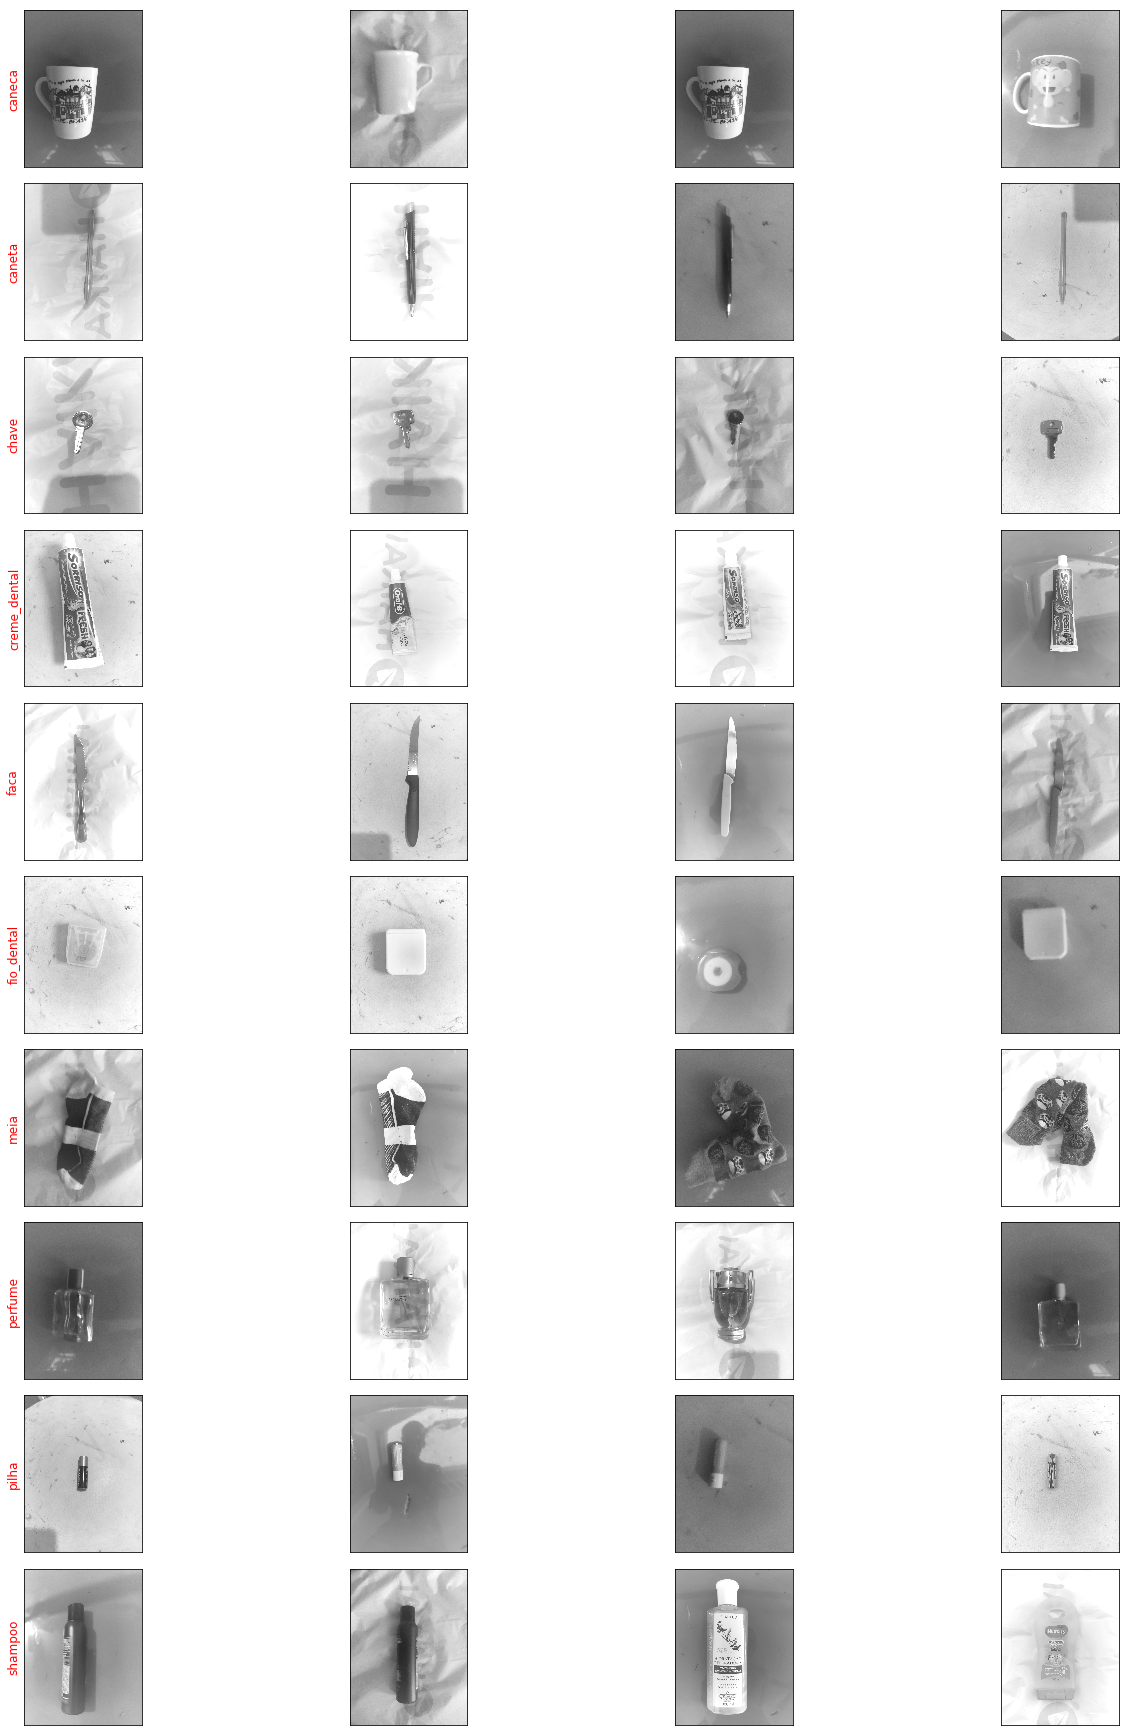

In [24]:
plotSample(augmented_dir,rand_sample,N_SAMPLE_BY_CLASS,True,'gradient')

#### Logarítmo da Imagem
Nesta sessão a função logarítmo será aplicada nas imagens em níveis de cinza.

\begin{equation*}
s = c.log(1+r)
\end{equation*}
Onde:<br>
**r** é o valor do pixel de entrada,<br>
**c** = 255/log(256) é uma constante escalar,<br>
**s** é o valor do pixel de saída.


In [28]:
def logTransformation(image):
    c = 255/np.log(256)
    log_image = c*np.log(1.0 + image)
    log_image = np.minimum(log_image,255)
    return log_image.astype(np.uint8)

In [29]:
applyFilter(original_gray_dir,augmented_dir,logTransformation,'log')

Finalizado. 1080 imagens processadas


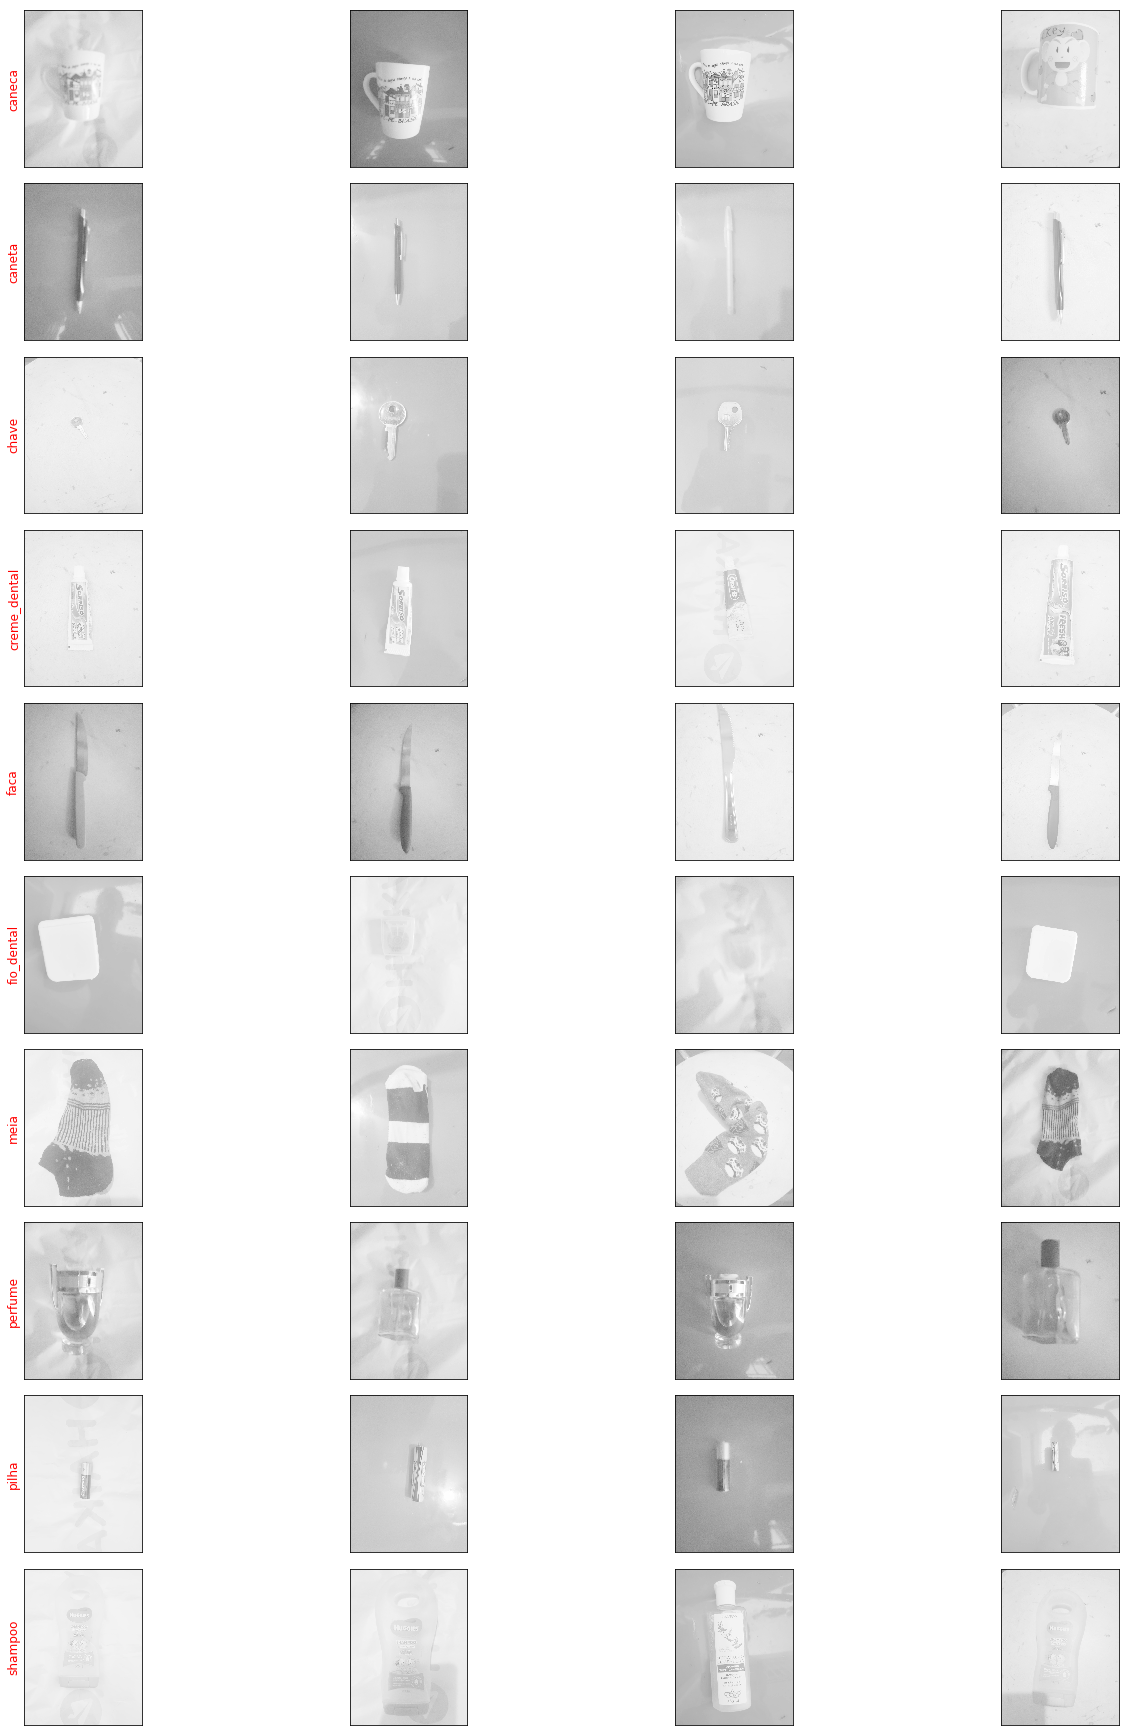

In [30]:
plotSample(augmented_dir,rand_sample,N_SAMPLE_BY_CLASS,gray_mode=True,prefix='log')

#### Potência* da Imagem
Nesta sessão a função gamma será aplicada nas imagens em níveis de cinza.

\begin{equation*}
s = c.r^{\gamma}
\end{equation*}
Onde:<br>
**r** é o valor do pixel de entrada,<br>
**c** = $255/255^{\gamma}$é uma constante positiva,<br>
**$\gamma = 2.5$** é a constante de potência. Este valor foi escolhido ao testar diferentes valores e visualizar o resultado,<br>
**s** é o valor do pixel de saída.

O valor de c foi escolhido de forma a tentar manter os valores dos pixels resultantes entre 0 e 255.

\* No EP é dito para fazer a exponencial, porém na aula filtragemEspacial5 (no tempo 22:40) o professor falou que se refere a função potência (gamma).

In [31]:
def gammaTransformation(image):
    gamma = 2.5
    c = pow(255,1-gamma)
    gamma_image = c*np.power(image*1.0,gamma)
    gamma_image = np.minimum(gamma_image,255) #Garantir que os valores não passem de 255
    return gamma_image.astype(np.uint8)

In [32]:
applyFilter(original_gray_dir,augmented_dir,gammaTransformation,'gamma')

Finalizado. 1080 imagens processadas


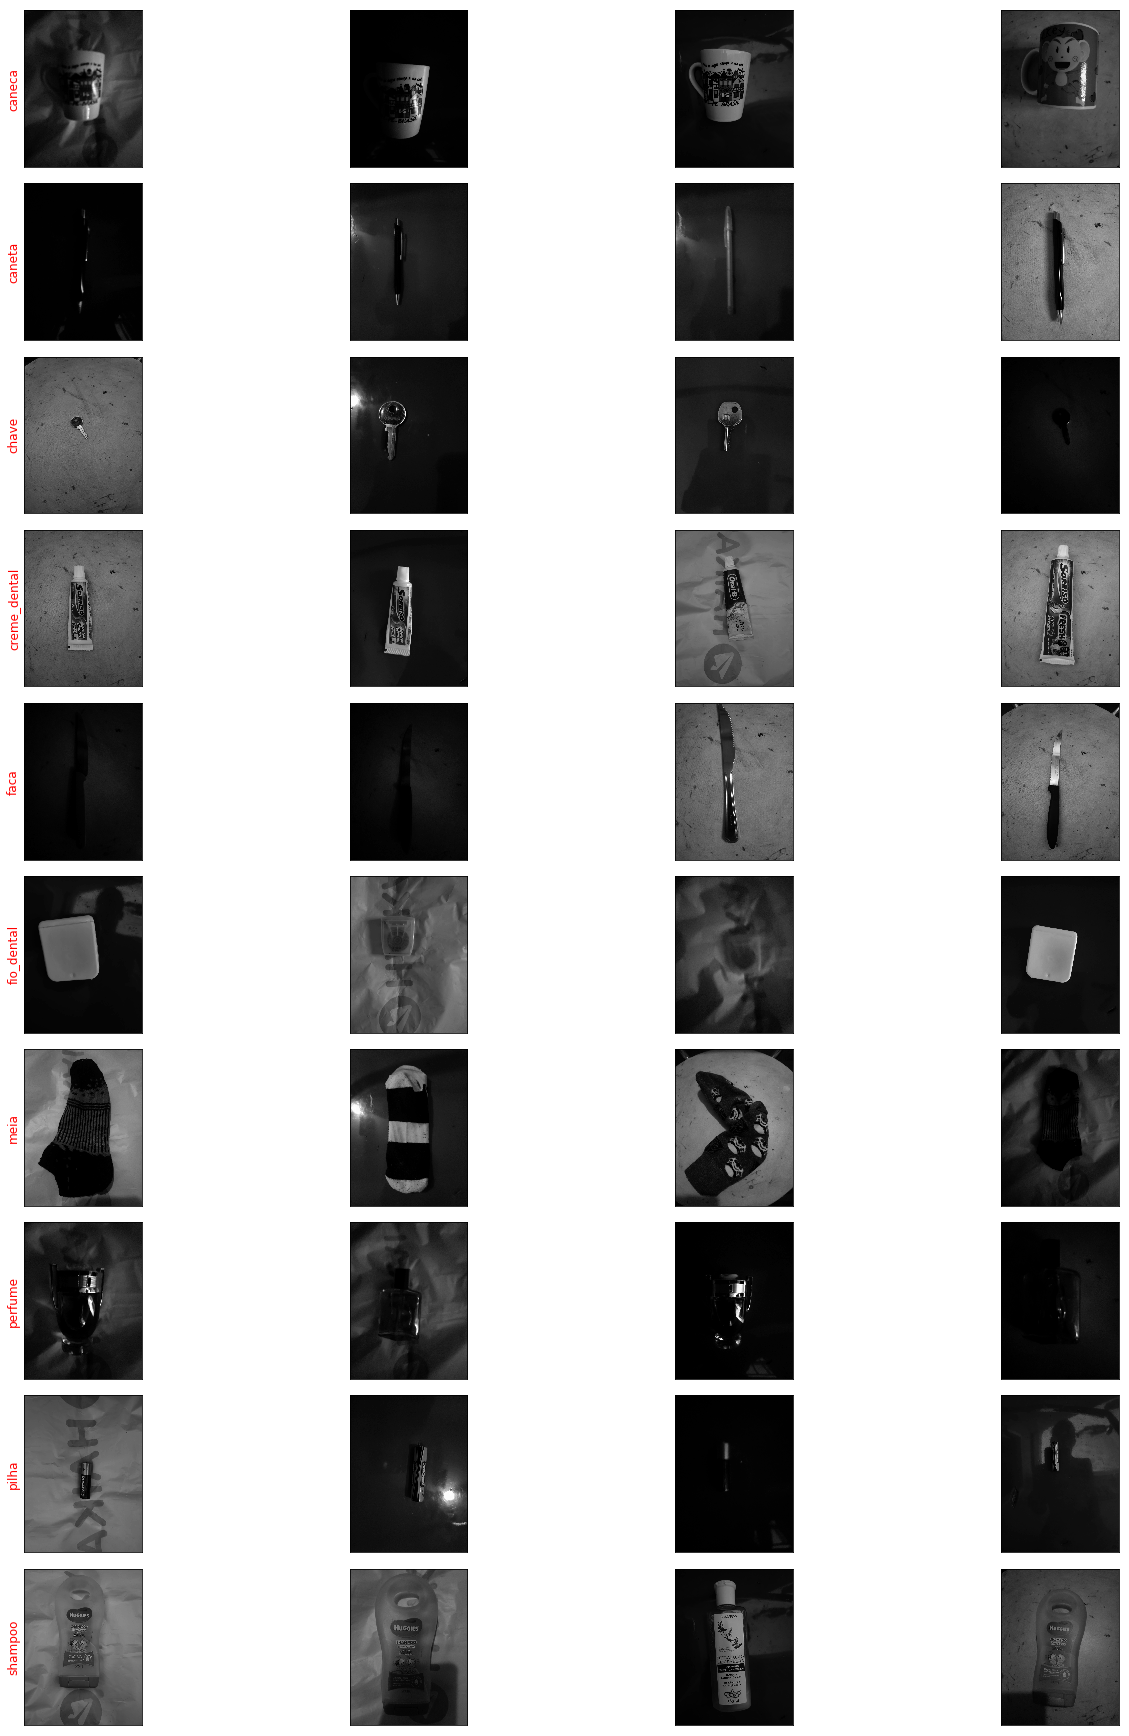

In [33]:
plotSample(augmented_dir,rand_sample,N_SAMPLE_BY_CLASS,gray_mode=True,prefix='gamma')

#### Filtro da Média da Imagem
Nesta sessão a o filtro da média será aplicado nas imagens em níveis de cinza utilizando o processo de convolução.
Para o cálculo da média, será utilizado um kernel matricial NxN com valores 1/(N²).

Por exemplo, um Kernel 3x3:

$$ \begin{bmatrix} \frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\ \frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\ \frac{1}{9} & \frac{1}{9} & \frac{1}{9} \end{bmatrix}$$

O kernel ultrapassa os limites da imagem no cálculo do valor da média nas bordas. Neste caso utilizarei o próprio valor da borda, como se ela fosse duplicada.

-----------------
Não sei se é necessário, mas fiz a implementação abaixo para mostrar que sei como implementar a convolução. Utilizei um kernel 3x3 para esta implementação, pois é simples e mostra as 
propriedades de uma convolução. Se o Kernel não tivesse valores constantes, eu teria invertido as posições de seus valores, pois a convolução pede esta transformação no kernel antes de ser aplicada.

In [34]:
def meanFilterManualConvolution(image):
    image = image*1.0
    convoluted_image = np.full(image.shape,0)
    (n_rows,n_columns) = image.shape
    for r in range(n_rows):
        for c in range(n_columns):
            convoluted_image[r][c] = image[max(r-1,0)][max(c-1,0)] + image[max(r-1,0)][c] +\
                                     image[max(r-1,0)][min(c+1,n_columns-1)] + image[r][max(c-1,0)] +\
                                     image[r][c] + image[r][min(c+1,n_columns-1)] +\
                                     image[min(r+1,n_rows-1)][max(c-1,0)] + image[min(r+1,n_rows-1)][c] +\
                                     image[min(r+1,n_rows-1)][min(c+1,n_columns-1)]
    convoluted_image = (convoluted_image/9).astype(np.uint8)
    return convoluted_image

Usarei a convolução implementada na biblioteca scipy, pois é mais eficiente e permitirá que eu utilize kerneis maiores que 3x3 sem precisar implementar um grande número de operações.
A média tem o efeito de suavisar a imagem, quanto maior o tamanho do kernel, mais embaçada a imagem fica.

O kernel feito na função tem tamanho 6, pois é o suficiente para deixar visível a diferença entre as imagens.

In [35]:
def meanFilterConvolution(image,kernel_size=6):
    kernel_shape = (kernel_size,kernel_size)
    kernel_value = 1/pow(kernel_size,2)
    kernel = np.full(kernel_shape,kernel_value)
    convoluted_image = convolve(image*1.0, kernel,mode='nearest').astype(np.uint8)
    return convoluted_image

In [41]:
applyFilter(original_gray_dir,augmented_dir,meanFilterConvolution,'meanFilter')

Finalizado. 1080 imagens processadas


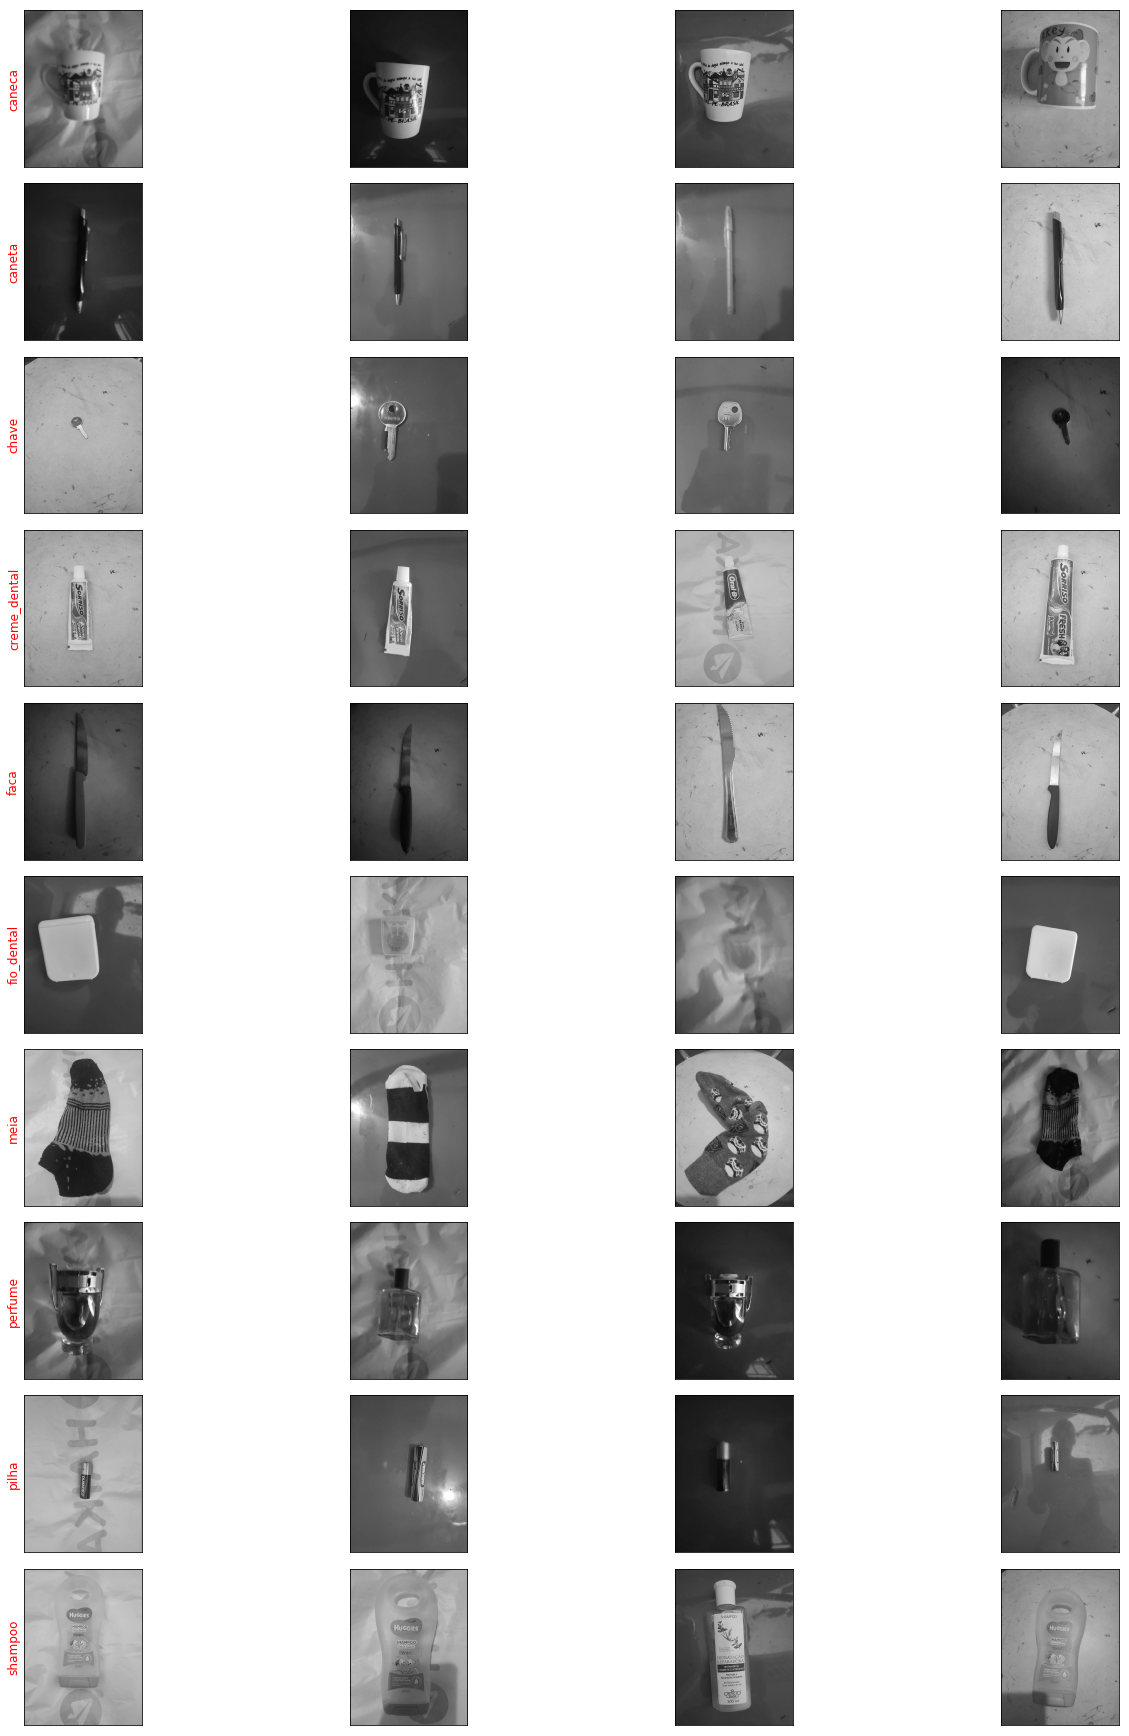

In [42]:
plotSample(augmented_dir,rand_sample,N_SAMPLE_BY_CLASS,gray_mode=True,prefix='meanFilter')

### Tabela Global Sumária da Base Aumentada

| Atributo | Valor |
| :- | -: |
| Número de Classes | 10 |
| Número de Imagens | 5400 |
| Tamanho da Base| 523 mb |
| Dimensão | 720 x 960 |

#### Tabela Detalhada Por Classe da Base Aumentada
| Classe | Qtd. Objetos | Qtd. Fundos | Qtd. luminação | Qtd. Repetições | Qtd. de Operações| Total de Amostras | 
| :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| Caneca | 3 | 3 | 4 | 3 | 5 | 540
| Caneta | 3 | 3 | 4 | 3 | 5 | 540
| Chave | 3 | 3 | 4 | 3 | 5 | 540
| Creme Dental | 3 | 3 | 4 | 3 | 5 | 540
| Faca | 3 | 3 | 4 | 3 | 5 | 540
| Fio Dental | 3 | 3 | 4 | 3 | 5 | 540
| Meia | 3 | 3 | 4 | 3 | 5 | 540
| Perfume | 3 | 3 | 4 | 3 | 5 | 540
| Pilha | 3 | 3 | 4 | 3 | 5 | 540
| Shampoo | 3 | 3 | 4 | 3 | 5 | 540